# LASSO REGRESSION  [ L1 REGULARIZATION ] 

In [ ]:
"""Two form of lienar regression => Lasso Regression(l1 regularization) and Ridge Regression(l2 regularization)
both are regularization technique
both prevent over fitting 
by adding penalty term(L1 norm for lasso and l2 norm for ridge)"""

In [ ]:
 """coefficient - > relationship between input and output feature

LASSO REGRESSION -> Least absolute shrinkage and selection operator
    also called L1 regulariation
        means adding penalty term to cost function to prevent overfitting
            Penalty called l1 norm
            
main use => "Shrinkage the cofficient"
[y = 0 +5x1 + 22x2] => [y = 0 +0.2 x1 + 1.2x2]"""


#### Main Use  =>  "Shrinkage of the Cofficient"

### WHY PREFFERED OVER LINEAR REGRESSION

- Automatic Feature selection (embedded feature selection technique)
- Prevent overfitting
- handel multicollinearity (input feature co-relatred to each other)
- handel multi-dimentional data
- bias variance tradeoff [Best Model - > low bias and low variance]

### steps

- perform linear regression and calculate coefficient
- calculate MSE 
- calculate l1 norm(penalty) => alpha( |B1| + |B2|)  [by default alpha =1 , if too big important feature can be removed, too small irrelevant feature will be included
- calculate cost function =>  MSE + l1 norm
- Minimize the cost function by optimization technique -> gradient descent (best value of coefficient where cost function is minimum)

### Code

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
diabetes = load_diabetes()

data = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
data["target"] = diabetes.target

In [4]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [8]:
x = data.drop("target", axis=1)
y = data["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

#### Apply linear regression

In [9]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [11]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"r2 score: {r2}")

Mean Squared Error: 2900.193628493482
r2 score: 0.45260276297191937


In [13]:
# Display the coefficient
coef = pd.Series(lr.coef_, index = x.columns)
coef

age     37.904021
sex   -241.964362
bmi    542.428759
bp     347.703844
s1    -931.488846
s2     518.062277
s3     163.419983
s4     275.317902
s5     736.198859
s6      48.670657
dtype: float64

### Apply Lasso Regression

In [15]:
lasso = Lasso()
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)

In [16]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"r2 score: {r2}")

Mean Squared Error: 3403.5757216070747
r2 score: 0.3575918767219112


In [18]:
# Display the coefficient
coef = pd.Series(lasso.coef_, index = x.columns)
coef

age      0.000000
sex     -0.000000
bmi    413.431848
bp      34.830515
s1       0.000000
s2       0.000000
s3      -0.000000
s4       0.000000
s5     258.152894
s6       0.000000
dtype: float64

###### we clearly see that the value of all the coefficient is reduced, we need to experiment on the value of alpha 

In [19]:
lasso.intercept_  # to find the value of intercet B0 in lasso regresion

152.6639595689638

### When to use lasso regression

- feature selection
- high dimentional dat
- multicollinearity (but not much effective)
- over fitting

## when not to use 

- non-linear data
- many important feature in data
- more computational expensive as comapared to ridge regression
- Sparsity (zeros)

### Sparsity in Lasso

In [23]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

In [25]:
np.random.seed(42)

In [27]:
x, y = make_regression( n_samples = 1000, n_features = 100, n_informative = 10, noise = 0.1, random_state = 42)


In [28]:
feature_names = [f'feature_{i}' for i in range (x.shape[1])]
data = pd.DataFrame(x, columns = feature_names)
data["target"] = y
data.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,target
0,-0.353273,-1.469201,-0.748674,0.568326,0.442359,-0.209873,0.482965,-0.086548,-0.276123,0.328453,...,-0.721595,-0.627373,2.202578,1.795924,-0.397011,1.392781,-0.719678,0.244672,-2.457507,-234.747811
1,0.257256,2.140309,-0.630692,-0.572608,-0.171383,0.338625,1.846603,-0.085243,-0.202000,0.927974,...,0.347883,-0.447221,-0.185935,0.549527,0.739119,-1.233837,-1.265086,-0.095604,-0.745764,51.233025
2,0.781233,-0.657438,1.976438,-0.169421,-0.920985,0.474556,-0.210418,0.612659,-0.205452,0.967930,...,-0.151687,-0.320438,0.389994,1.184124,-1.637070,-0.513537,1.676920,-0.630121,-1.034070,-106.716029
3,-2.358464,0.204154,-1.579345,0.289784,-0.174711,-0.024830,-1.862864,-0.585063,-0.133526,0.454331,...,-0.825769,-0.228151,-0.014925,0.435048,0.362451,-0.488274,0.282450,2.384598,-0.429833,-55.619155
4,-0.448543,1.635798,0.564842,0.211397,-0.318748,-1.472037,0.644518,0.808036,-1.389299,-0.114802,...,0.305243,-0.048965,-0.739771,-0.143259,1.040062,-1.400071,0.711411,1.122374,1.378470,-111.074505


In [29]:
len(data.columns)

101

In [30]:
x = data.drop("target", axis = 1)
y = data["target"]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [31]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [33]:
lasso = Lasso(alpha = 0.1)
lasso.fit(x_train_scaled, y_train)
y_pred = lasso.predict(x_test_scaled)

In [36]:
coef = pd.Series(lasso.coef_ , index = x.columns)

In [37]:
coef

feature_0     0.0
feature_1     0.0
feature_2    -0.0
feature_3     0.0
feature_4     0.0
             ... 
feature_95   -0.0
feature_96   -0.0
feature_97    0.0
feature_98   -0.0
feature_99   -0.0
Length: 100, dtype: float64

In [39]:
non_zero_coef = (coef !=0).sum()
non_zero_coef

10

##### initially total input columns : 100
##### non-zero coefficient columns : 10
##### zero coefficient columns : 90

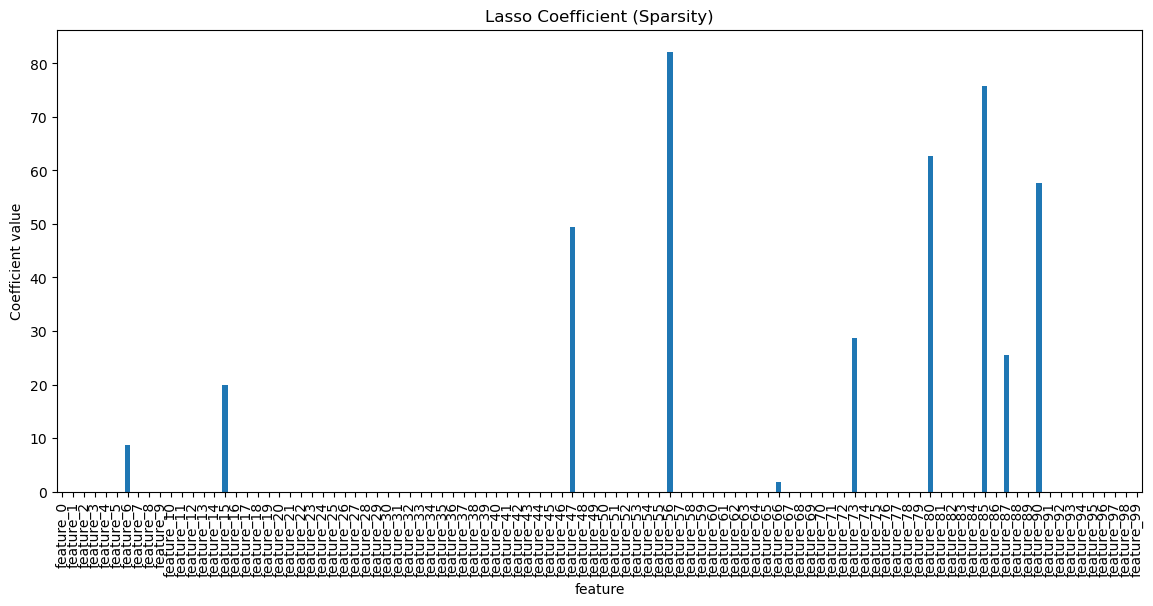

In [40]:
plt.figure(figsize = (14,6))
coef.plot(kind = "bar")
plt.title("Lasso Coefficient (Sparsity)")
plt.xlabel("feature")
plt.ylabel("Coefficient value")
plt.show()